In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
def prepare_tensor(path):
    img = np.array(Image.open(path))
    actions = {
            'walk' : {
                'range': [(9,10),(10,11),(11,12)],
                'frames': [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8)]
                },
            'spellcast': {
                'range': [(1,2),(2,3),(3,4)],
                'frames': [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(6,7)]
                },
            'slash': {
                'range': [(14,15),(15,16),(16,17)],
                'frames':  [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(5,6),(5,6)]
                }
            }
    slices = {}
    for action,params in actions.items():
        slices[action] = []
        for row in params['range']:
            sprite = []
            for col in params['frames']:
                sprite.append(transforms.functional.to_tensor(img[64*row[0]:64*row[1],64*col[0]:64*col[1],:]))
            slices[action].append(torch.stack(sprite))
        slices[action] = torch.stack(slices[action])
    return slices #slices[action][position(0,1,2)][frame no.][image]

In [20]:
slices = prepare_tensor('test.png')

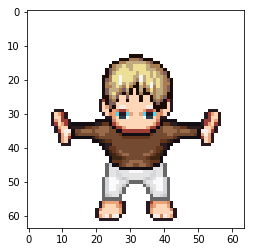

In [23]:
image = transforms.functional.to_pil_image(slices['spellcast'][1][4])
plt.imshow(image)